In [3]:
from fastai.tabular import *
from path import Path
import pandas as pd

In [4]:
path = Path('/home/jupyter/kaggle/titanic/data')

In [35]:
df = pd.read_csv(path/'train.csv')
cat_names = ['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']
cont_names = ['Age', 'Fare']
procs = [FillMissing, Categorify, Normalize]
dep_var = 'Survived'

In [39]:
df_test = pd.read_csv(path/'test.csv')
df_test['Fare'] = df_test['Fare'].fillna(0)

In [40]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
        .split_by_idx(list(range(650,len(df))))
        .label_from_df(cols=dep_var)
        .add_test(TabularList.from_df(df_test, path=path))
        .databunch(bs=20))

In [41]:
data.show_batch(rows=10)

PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Age_na,Age,Fare,target
94,3,male,1,2,C.A. 2315,#na#,S,False,-0.2671,-0.2412,0
213,3,male,0,0,A/5 21174,#na#,S,False,-0.5739,-0.5367,0
365,3,male,1,0,370365,#na#,Q,True,-0.1137,-0.3538,0
35,1,male,1,0,PC 17604,#na#,C,False,-0.1137,1.1249,0
338,1,female,0,0,16966,E40,C,False,0.8834,2.2855,1
430,3,male,0,0,SOTON/O.Q. 392078,E10,S,False,0.1931,-0.5190,1
633,1,male,0,0,13214,B50,C,False,0.1931,-0.0211,1
87,3,male,1,3,W./C. 6608,#na#,S,False,-1.0341,0.0649,0
513,1,male,0,0,PC 17473,E25,S,False,0.4999,-0.1145,1
646,1,male,1,0,PC 17572,D33,C,False,1.4203,1.0042,1


In [42]:
learn = tabular_learner(data, layers=[600, 400], metrics=accuracy, y_range=[0,1.2])

In [146]:
learn.fit(6, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.554028,0.466841,0.813278,00:00
1,0.453778,0.442750,0.842324,00:00
2,0.405436,0.454521,0.838174,00:00
3,0.388016,0.450523,0.834025,00:00
4,0.362071,0.445288,0.842324,00:00
5,0.347796,0.449578,0.838174,00:00


In [147]:
learn.save('stage-1')

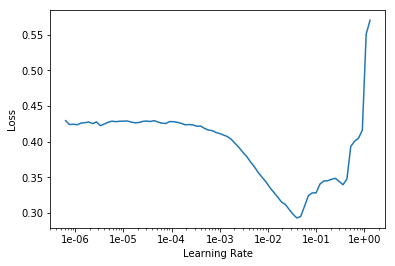

In [39]:
learn.recorder.plot()

In [43]:
learn.load('stage-1')

Learner(data=TabularDataBunch;

Train: LabelList (650 items)
x: TabularList
PassengerId 1; Pclass 3; Sex male; SibSp 1; Parch 0; Ticket A/5 21171; Cabin #na#; Embarked S; Age_na False; Age -0.5739; Fare -0.5367; ,PassengerId 2; Pclass 1; Sex female; SibSp 1; Parch 0; Ticket PC 17599; Cabin C85; Embarked C; Age_na False; Age 0.6533; Fare 0.8835; ,PassengerId 3; Pclass 3; Sex female; SibSp 0; Parch 0; Ticket STON/O2. 3101282; Cabin #na#; Embarked S; Age_na False; Age -0.2671; Fare -0.5218; ,PassengerId 4; Pclass 1; Sex female; SibSp 1; Parch 0; Ticket 113803; Cabin C123; Embarked S; Age_na False; Age 0.4232; Fare 0.4802; ,PassengerId 5; Pclass 3; Sex male; SibSp 0; Parch 0; Ticket 373450; Cabin #na#; Embarked S; Age_na False; Age 0.4232; Fare -0.5190; 
y: CategoryList
0,1,1,1,0
Path: /home/jupyter/kaggle/titanic/data;

Valid: LabelList (241 items)
x: TabularList
PassengerId #na#; Pclass 3; Sex male; SibSp 0; Parch 0; Ticket #na#; Cabin #na#; Embarked S; Age_na True; Age -0.1137; Fare -0.

In [45]:
result = learn.get_preds(DatasetType.Test)

In [22]:
df_result = pd.DataFrame(columns=['PassengerId', 'Survived'])

In [65]:
df_result['PassengerId'] = df_test['PassengerId']
df_result['Survived'] = np.round(result[0][:, 1].numpy())
df_result['Survived'] = df_result['Survived'].astype(int)

In [68]:
df_result.to_csv(path/'submission.csv', index=False)